# Using `BlackMarblePy`

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/worldbank/blackmarblepy/blob/main/notebooks/blackmarblepy.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/worldbank/blackmarblepy/main?labpath=notebooks%2Fblackmarblepy.ipynb)

This Jupyter notebook provides a guided exploration of the [**BlackMarblePy**](https://pypi.org/project/blackmarblepy/) package, showcasing its capabilities for downloading, visualizing, and analyzing NASA Black Marble nighttime lights data. Through interactive examples, you'll learn how to:

- Download daily, monthly, and yearly data for specific dates, regions, or bounding boxes.
- Visualize downloaded data in various forms, including maps and  bar charts.
- Save visualizations and analysis results for further use.

## Requirements

In this example, we use additional dependencies included below below for convenience. However, it is strongly recommended to install requirements on a [virtual environment](https://docs.python.org/3/library/venv.html).

In [1]:
#!pip install blackmarblepy
#!pip install colorcet contextily geopandas matplotlib seaborn pandas folium mapclassify

In [2]:
import os
import datetime

import colorcet as cc
import contextily as cx
import geopandas
import matplotlib.pyplot as plt
import pandas as pd
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import HoverTool, Title

from blackmarble.extract import bm_extract
from blackmarble.raster import bm_raster

from dotenv import load_dotenv

%load_ext autoreload
%load_ext watermark
%autoreload 2

load_dotenv()

plt.rcParams["figure.figsize"] = (18, 10)

%watermark -v -u -n -p blackmarble

Last updated: Fri Jun 06 2025

Python implementation: CPython
Python version       : 3.10.15
IPython version      : 8.37.0

blackmarble: 2024.8.2.dev6+gbecc35b.d20250606



### Generate NASA Earthdata Token

**BlackMarblePy** requires a [NASA Earthdata](https://urs.earthdata.nasa.gov) **bearer token**. To generate a token, you may use [Earthdata Login](https://urs.earthdata.nasa.gov/documentation)

1. Access [Earthdata Login](https://urs.earthdata.nasa.gov/profile). In case you haven't already, you must [register](https://urs.earthdata.nasa.gov/users/new).
    ```{figure} ../images/nasa_earthdata_profile.png
    ---
    height: 150px
    ---
2. Select **Generate Token**. If the token is expired or you are in need of one, click the **Generate Token** button. 
    ```{figure} ../images/nasa_earthdata_generate_token.png
    ---
    height: 400px
    ---
    ```
    
    ```{caution}
    Please be aware that the "Affiliation" information on your [Earthdata profile](https://urs.earthdata.nasa.gov/profile/edit) is mandatory. Without this information, the [NASA Earthdata token](https://urs.earthdata.nasa.gov/documentation) will be invalid. In case of a download error, try visiting the URL which is failing, as you may be prompted to grant permissions.
    
    ![](../images/nasa_earthdata_affiliations.png)
    ```
    
3. Copy and use the token with [BlackMarblePy](https://worldbank.github.io/blackmarblepy/api/blackmarble.html) *securely*. For example, by setting secret or an [environment variable](https://wiki.debian.org/EnvironmentVariables).

   ```python
    # An environment variable can obfuscate to secure a secret
    import os
    
    bearer = os.getenv("BLACKMARBLE_TOKEN")
    ```
    
    ```python
    # If using Google Colab, use Secrets
    from google.colab import userdata
    
    bearer = userdata.get('BLACKMARBLE_TOKEN')
    ```

    ```{important}
    Using a secret token securely in Python code involves several practices to ensure the token is not exposed unintentionally. For instance, storing the secret token in an environment variable, in configuration files or using secret management services. In this example, we set up an environment variable.
    ```
    
    ```{seealso}
    - [Using Secrets Securely](https://worldbank.github.io/template/notebooks/nasa-apod.html)
    - [Best Practices froor Securing API Keys](https://rapidapi.com/guides/practices-api-keys)
    - [How to use Secrets in Google Colab](https://medium.com/@parthdasawant/how-to-use-secrets-in-google-colab-450c38e3ec75)
    ```

In [3]:
# If using Google Colab, you may use Secrets and uncomment below
# from google.colab import userdata
# os.environ["BLACKMARBLE_TOKEN"] = userdata.get('BLACKMARBLE_TOKEN')

bearer = os.getenv("BLACKMARBLE_TOKEN")

### Define Region of Interest

Define region of interest for which we will download nighttime lights data. We obtain the polygon from [GADM](https://gadm.org/download_country.html).

In [4]:
gdf = geopandas.read_file(
    "https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_GHA_1.json.zip"
)
gdf.explore(tiles="CartoDB dark_matter")

```{figure} ../../images/favicon.ico
---
height: 0px
---
This map of Ghana displays the administrative boundaries as obtained from the Global Administrative Areas (GADM) database. The map highlights the regional divisions and key cities, providing a detailed geographic overview of the country. Data source: GADM, version 4.0.
```

## Examples

In this section, we will demonstrate how to use [BlackMarblePy](https://pypi.org/project/blackmarblepy/) to download and manipulate NASA Black Marble data. 

### Create raster of nighttime lights

In this section, we show examples of creating daily, monthly, and annual rasters of nighttime lights for the **Region of Interest** selected.


#### Daily

In [5]:
# Daily data: raster for February 5, 2021
VNP46A2_20210205 = bm_raster(
    gdf, product_id="VNP46A2", date_range="2021-02-05", bearer=bearer
)
VNP46A2_20210205

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/4.41M [00:00<?, ?B/s]

  0%|          | 0.00/3.26M [00:00<?, ?B/s]

  0%|          | 0.00/3.15M [00:00<?, ?B/s]

  0%|          | 0.00/5.58M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING TILES | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

<xarray.Dataset> Size: 13MB
Dimensions:                            (x: 1071, y: 1544, time: 1)
Coordinates:
  * x                                  (x) float64 9kB -3.26 -3.256 ... 1.198
  * y                                  (y) float64 12kB 11.17 11.17 ... 4.744
  * time                               (time) datetime64[ns] 8B 2021-02-05
Data variables:
    Gap_Filled_DNB_BRDF-Corrected_NTL  (time, y, x) float64 13MB nan nan ... nan
Attributes: (12/41)
    AlgorithmType:                     b'SCI'
    DataResolution:                    b'Moderate'
    DayNightFlag:                      b'Day'
    EastBoundingCoord:                 0.0
    EndTime:                           b'2021-02-05 23:59:59.000'
    GranuleDayNightFlag:               b'Day'
    ...                                ...
    VersionID:                         b'001'
    VerticalTileNumber:                b'07'
    WestBoundingCoord:                 -10.0
    AREA_OR_POINT:                     Area
    scale_factor:                      1.0
    add_offset:                        0.0

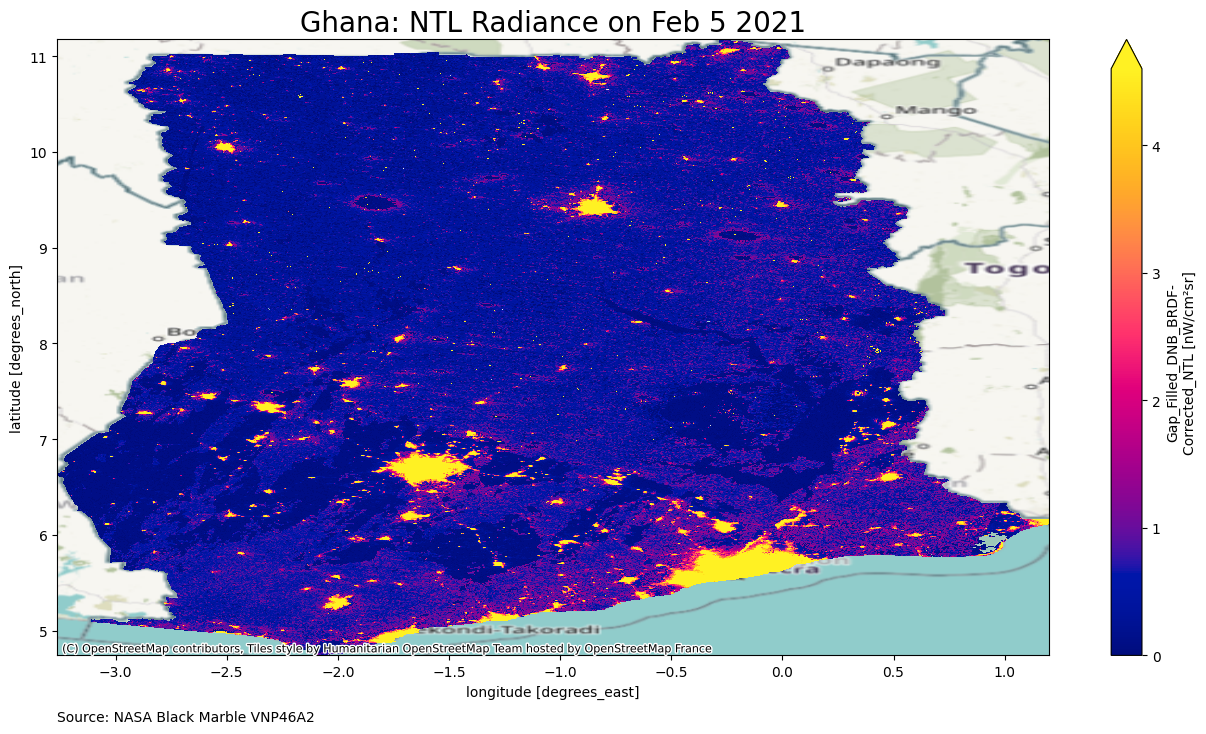

In [6]:
fig, ax = plt.subplots(figsize=(16, 8))

VNP46A2_20210205["Gap_Filled_DNB_BRDF-Corrected_NTL"].sel(
    time="2021-02-05"
).plot.pcolormesh(
    ax=ax,
    cmap=cc.cm.bmy,
    robust=True,
)
cx.add_basemap(ax, crs=gdf.crs.to_string())

ax.text(
    0,
    -0.1,
    "Source: NASA Black Marble VNP46A2",
    ha="left",
    va="center",
    transform=ax.transAxes,
    fontsize=10,
    color="black",
    weight="normal",
)
ax.set_title("Ghana: NTL Radiance on Feb 5 2021", fontsize=20);

#### Monthly

In [7]:
# Monthly data: raster for October 2021
VNP46A3_202110 = bm_raster(
    gdf, product_id="VNP46A3", date_range="2021-10-01", bearer=bearer
)
VNP46A3_202110

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/10.6M [00:00<?, ?B/s]

  0%|          | 0.00/8.64M [00:00<?, ?B/s]

  0%|          | 0.00/11.5M [00:00<?, ?B/s]

  0%|          | 0.00/7.72M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING TILES | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

<xarray.Dataset> Size: 13MB
Dimensions:                        (x: 1071, y: 1545, time: 1)
Coordinates:
  * x                              (x) float64 9kB -3.259 -3.255 ... 1.193 1.197
  * y                              (y) float64 12kB 11.17 11.17 ... 4.746 4.742
  * time                           (time) datetime64[ns] 8B 2021-10-01
Data variables:
    NearNadir_Composite_Snow_Free  (time, y, x) float64 13MB nan nan ... nan nan
Attributes: (12/51)
    AlgorithmType:                     b'SCI'
    AlgorithmVersion:                  b'NPP_PR46A3 2.0.0'
    Conventions:                       b'CF-1.6'
    creator_email:                     b'modis-ops@lists.nasa.gov'
    creator_name:                      b'VIIRS Land SIPS Processing Group'
    creator_url:                       b'https://ladsweb.modaps.eosdis.nasa.gov'
    ...                                ...
    VersionID:                         b'001'
    VerticalTileNumber:                b'07'
    WestBoundingCoord:                 0.0
    AREA_OR_POINT:                     Area
    scale_factor:                      1.0
    add_offset:                        0.0

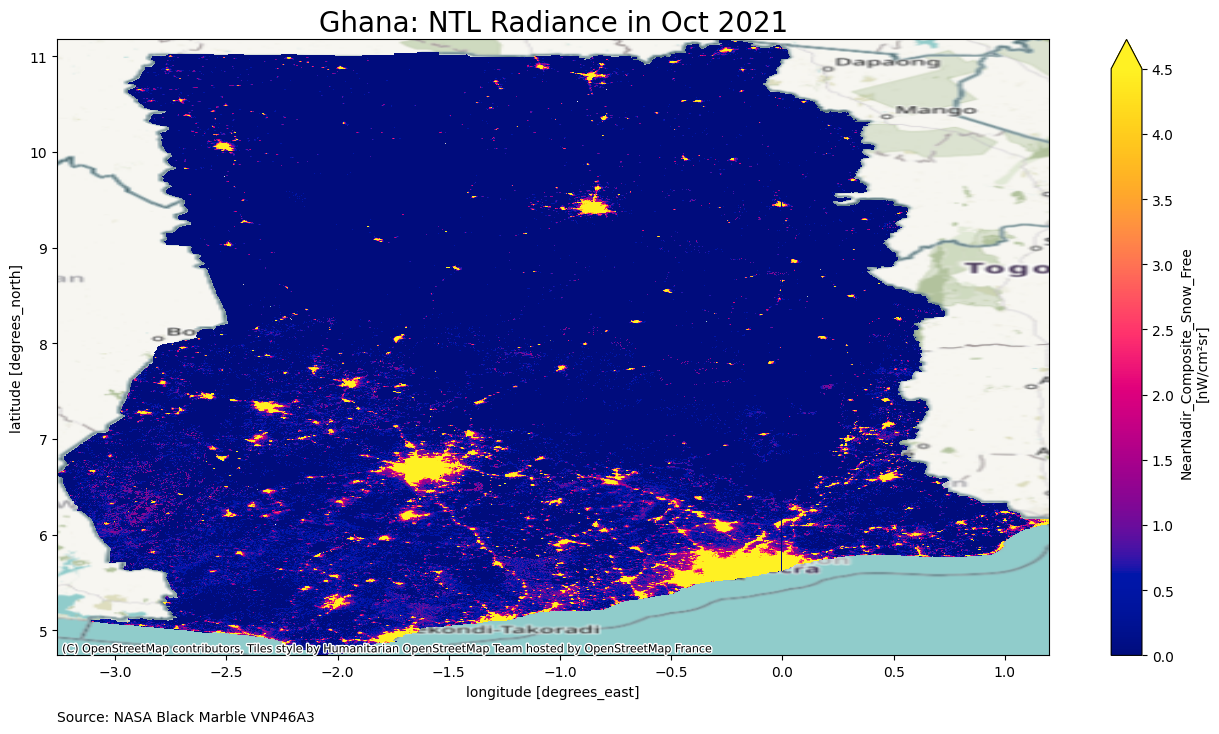

In [8]:
fig, ax = plt.subplots(figsize=(16, 8))

VNP46A3_202110["NearNadir_Composite_Snow_Free"].sel(time="2021-10-01").plot.pcolormesh(
    ax=ax,
    cmap=cc.cm.bmy,
    robust=True,
)
cx.add_basemap(ax, crs=gdf.crs.to_string())

ax.text(
    0,
    -0.1,
    "Source: NASA Black Marble VNP46A3",
    ha="left",
    va="center",
    transform=ax.transAxes,
    fontsize=10,
    color="black",
    weight="normal",
)
ax.set_title("Ghana: NTL Radiance in Oct 2021", fontsize=20);

#### Annual

In [9]:
# Annual data: raster for 2021
VNP46A4_2021 = bm_raster(
    gdf, product_id="VNP46A4", date_range="2021-01-01", bearer=bearer
)
VNP46A4_2021

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/14.0M [00:00<?, ?B/s]

  0%|          | 0.00/9.37M [00:00<?, ?B/s]

  0%|          | 0.00/13.8M [00:00<?, ?B/s]

  0%|          | 0.00/9.66M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING TILES | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

<xarray.Dataset> Size: 13MB
Dimensions:                        (x: 1071, y: 1545, time: 1)
Coordinates:
  * x                              (x) float64 9kB -3.259 -3.255 ... 1.193 1.197
  * y                              (y) float64 12kB 11.17 11.17 ... 4.746 4.742
  * time                           (time) datetime64[ns] 8B 2021-01-01
Data variables:
    NearNadir_Composite_Snow_Free  (time, y, x) float64 13MB nan nan ... nan nan
Attributes: (12/51)
    AlgorithmType:                     b'SCI'
    AlgorithmVersion:                  b'NPP_PR46A3 2.0.0'
    Conventions:                       b'CF-1.6'
    creator_email:                     b'modis-ops@lists.nasa.gov'
    creator_name:                      b'VIIRS Land SIPS Processing Group'
    creator_url:                       b'https://ladsweb.modaps.eosdis.nasa.gov'
    ...                                ...
    VersionID:                         b'001'
    VerticalTileNumber:                b'07'
    WestBoundingCoord:                 0.0
    AREA_OR_POINT:                     Area
    scale_factor:                      1.0
    add_offset:                        0.0

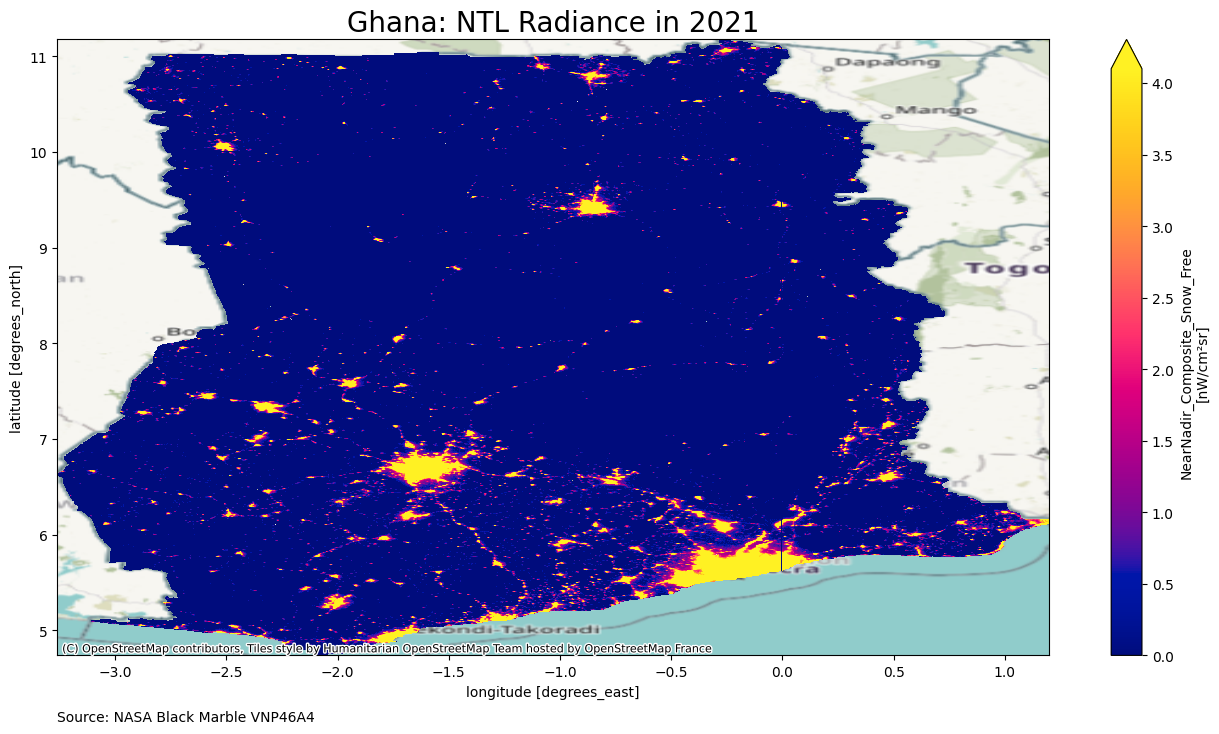

In [10]:
fig, ax = plt.subplots(figsize=(16, 8))

VNP46A4_2021["NearNadir_Composite_Snow_Free"].sel(time="2021-01-01").plot.pcolormesh(
    ax=ax,
    cmap=cc.cm.bmy,
    robust=True,
)
cx.add_basemap(ax, crs=gdf.crs.to_string())

ax.text(
    0,
    -0.1,
    "Source: NASA Black Marble VNP46A4",
    ha="left",
    va="center",
    transform=ax.transAxes,
    fontsize=10,
    color="black",
    weight="normal",
)
ax.set_title("Ghana: NTL Radiance in 2021", fontsize=20);

### Create a raster stack of nighttime lights across multiple time periods

In this section, we illustrate how to retrieve and extract [NASA Black Marble](https://blackmarble.gsfc.nasa.gov) data for multiple time periods. The function will return a raster stack, where each raster band corresponds to a different date. The following code snippet provides examples of getting data across multiple days, months, and years. For each example, we define a date range using [`pd.date_range`](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html).

In [11]:
# Raster stack of daily data
r_daily = bm_raster(
    gdf,
    product_id="VNP46A2",
    date_range=pd.date_range("2022-01-01", "2022-03-31", freq="D"),
    bearer=bearer,
)

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/360 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/360 [00:00<?, ?it/s]

  0%|          | 0.00/3.25M [00:00<?, ?B/s]

  0%|          | 0.00/6.77M [00:00<?, ?B/s]

  0%|          | 0.00/3.34M [00:00<?, ?B/s]

  0%|          | 0.00/3.38M [00:00<?, ?B/s]

  0%|          | 0.00/4.09M [00:00<?, ?B/s]

  0%|          | 0.00/4.28M [00:00<?, ?B/s]

  0%|          | 0.00/3.62M [00:00<?, ?B/s]

  0%|          | 0.00/4.11M [00:00<?, ?B/s]

  0%|          | 0.00/4.25M [00:00<?, ?B/s]

  0%|          | 0.00/4.07M [00:00<?, ?B/s]

  0%|          | 0.00/4.71M [00:00<?, ?B/s]

  0%|          | 0.00/6.31M [00:00<?, ?B/s]

  0%|          | 0.00/3.74M [00:00<?, ?B/s]

  0%|          | 0.00/4.31M [00:00<?, ?B/s]

  0%|          | 0.00/3.91M [00:00<?, ?B/s]

  0%|          | 0.00/4.84M [00:00<?, ?B/s]

  0%|          | 0.00/4.30M [00:00<?, ?B/s]

  0%|          | 0.00/4.45M [00:00<?, ?B/s]

  0%|          | 0.00/6.76M [00:00<?, ?B/s]

  0%|          | 0.00/6.97M [00:00<?, ?B/s]

  0%|          | 0.00/4.26M [00:00<?, ?B/s]

  0%|          | 0.00/7.18M [00:00<?, ?B/s]

  0%|          | 0.00/2.09M [00:00<?, ?B/s]

  0%|          | 0.00/4.43M [00:00<?, ?B/s]

  0%|          | 0.00/6.31M [00:00<?, ?B/s]

  0%|          | 0.00/3.97M [00:00<?, ?B/s]

  0%|          | 0.00/5.80M [00:00<?, ?B/s]

  0%|          | 0.00/4.49M [00:00<?, ?B/s]

  0%|          | 0.00/5.05M [00:00<?, ?B/s]

  0%|          | 0.00/4.49M [00:00<?, ?B/s]

  0%|          | 0.00/4.15M [00:00<?, ?B/s]

  0%|          | 0.00/6.08M [00:00<?, ?B/s]

  0%|          | 0.00/5.86M [00:00<?, ?B/s]

  0%|          | 0.00/4.82M [00:00<?, ?B/s]

  0%|          | 0.00/4.43M [00:00<?, ?B/s]

  0%|          | 0.00/4.06M [00:00<?, ?B/s]

  0%|          | 0.00/3.98M [00:00<?, ?B/s]

  0%|          | 0.00/4.39M [00:00<?, ?B/s]

  0%|          | 0.00/2.98M [00:00<?, ?B/s]

  0%|          | 0.00/8.42M [00:00<?, ?B/s]

  0%|          | 0.00/6.67M [00:00<?, ?B/s]

  0%|          | 0.00/2.58M [00:00<?, ?B/s]

  0%|          | 0.00/4.18M [00:00<?, ?B/s]

  0%|          | 0.00/4.05M [00:00<?, ?B/s]

  0%|          | 0.00/4.66M [00:00<?, ?B/s]

  0%|          | 0.00/4.17M [00:00<?, ?B/s]

  0%|          | 0.00/4.79M [00:00<?, ?B/s]

  0%|          | 0.00/5.29M [00:00<?, ?B/s]

  0%|          | 0.00/5.64M [00:00<?, ?B/s]

  0%|          | 0.00/3.64M [00:00<?, ?B/s]

  0%|          | 0.00/5.70M [00:00<?, ?B/s]

  0%|          | 0.00/5.53M [00:00<?, ?B/s]

  0%|          | 0.00/5.11M [00:00<?, ?B/s]

  0%|          | 0.00/4.68M [00:00<?, ?B/s]

  0%|          | 0.00/3.70M [00:00<?, ?B/s]

  0%|          | 0.00/4.36M [00:00<?, ?B/s]

  0%|          | 0.00/4.36M [00:00<?, ?B/s]

  0%|          | 0.00/5.16M [00:00<?, ?B/s]

  0%|          | 0.00/4.31M [00:00<?, ?B/s]

  0%|          | 0.00/4.58M [00:00<?, ?B/s]

  0%|          | 0.00/6.07M [00:00<?, ?B/s]

  0%|          | 0.00/5.72M [00:00<?, ?B/s]

  0%|          | 0.00/4.27M [00:00<?, ?B/s]

  0%|          | 0.00/4.58M [00:00<?, ?B/s]

  0%|          | 0.00/3.91M [00:00<?, ?B/s]

  0%|          | 0.00/3.36M [00:00<?, ?B/s]

  0%|          | 0.00/3.49M [00:00<?, ?B/s]

  0%|          | 0.00/3.58M [00:00<?, ?B/s]

  0%|          | 0.00/5.12M [00:00<?, ?B/s]

  0%|          | 0.00/6.73M [00:00<?, ?B/s]

  0%|          | 0.00/4.16M [00:00<?, ?B/s]

  0%|          | 0.00/4.81M [00:00<?, ?B/s]

  0%|          | 0.00/4.89M [00:00<?, ?B/s]

  0%|          | 0.00/5.35M [00:00<?, ?B/s]

  0%|          | 0.00/4.44M [00:00<?, ?B/s]

  0%|          | 0.00/3.65M [00:00<?, ?B/s]

  0%|          | 0.00/3.46M [00:00<?, ?B/s]

  0%|          | 0.00/4.09M [00:00<?, ?B/s]

  0%|          | 0.00/4.02M [00:00<?, ?B/s]

  0%|          | 0.00/3.46M [00:00<?, ?B/s]

  0%|          | 0.00/6.15M [00:00<?, ?B/s]

  0%|          | 0.00/4.10M [00:00<?, ?B/s]

  0%|          | 0.00/5.22M [00:00<?, ?B/s]

  0%|          | 0.00/4.12M [00:00<?, ?B/s]

  0%|          | 0.00/3.21M [00:00<?, ?B/s]

  0%|          | 0.00/4.40M [00:00<?, ?B/s]

  0%|          | 0.00/4.70M [00:00<?, ?B/s]

  0%|          | 0.00/2.33M [00:00<?, ?B/s]

  0%|          | 0.00/4.86M [00:00<?, ?B/s]

  0%|          | 0.00/2.12M [00:00<?, ?B/s]

  0%|          | 0.00/3.99M [00:00<?, ?B/s]

  0%|          | 0.00/2.90M [00:00<?, ?B/s]

  0%|          | 0.00/3.98M [00:00<?, ?B/s]

  0%|          | 0.00/2.84M [00:00<?, ?B/s]

  0%|          | 0.00/3.99M [00:00<?, ?B/s]

  0%|          | 0.00/1.90M [00:00<?, ?B/s]

  0%|          | 0.00/1.73M [00:00<?, ?B/s]

  0%|          | 0.00/1.49M [00:00<?, ?B/s]

  0%|          | 0.00/1.19M [00:00<?, ?B/s]

  0%|          | 0.00/2.18M [00:00<?, ?B/s]

  0%|          | 0.00/1.93M [00:00<?, ?B/s]

  0%|          | 0.00/2.75M [00:00<?, ?B/s]

  0%|          | 0.00/2.58M [00:00<?, ?B/s]

  0%|          | 0.00/3.17M [00:00<?, ?B/s]

  0%|          | 0.00/3.04M [00:00<?, ?B/s]

  0%|          | 0.00/3.66M [00:00<?, ?B/s]

  0%|          | 0.00/3.01M [00:00<?, ?B/s]

  0%|          | 0.00/3.51M [00:00<?, ?B/s]

  0%|          | 0.00/3.54M [00:00<?, ?B/s]

  0%|          | 0.00/1.48M [00:00<?, ?B/s]

  0%|          | 0.00/3.51M [00:00<?, ?B/s]

  0%|          | 0.00/3.36M [00:00<?, ?B/s]

  0%|          | 0.00/2.34M [00:00<?, ?B/s]

  0%|          | 0.00/3.03M [00:00<?, ?B/s]

  0%|          | 0.00/3.00M [00:00<?, ?B/s]

  0%|          | 0.00/2.43M [00:00<?, ?B/s]

  0%|          | 0.00/3.57M [00:00<?, ?B/s]

  0%|          | 0.00/2.56M [00:00<?, ?B/s]

  0%|          | 0.00/1.97M [00:00<?, ?B/s]

  0%|          | 0.00/1.84M [00:00<?, ?B/s]

  0%|          | 0.00/2.72M [00:00<?, ?B/s]

  0%|          | 0.00/2.74M [00:00<?, ?B/s]

  0%|          | 0.00/2.76M [00:00<?, ?B/s]

  0%|          | 0.00/2.78M [00:00<?, ?B/s]

  0%|          | 0.00/2.88M [00:00<?, ?B/s]

  0%|          | 0.00/2.48M [00:00<?, ?B/s]

  0%|          | 0.00/2.81M [00:00<?, ?B/s]

  0%|          | 0.00/2.54M [00:00<?, ?B/s]

  0%|          | 0.00/3.18M [00:00<?, ?B/s]

  0%|          | 0.00/1.46M [00:00<?, ?B/s]

  0%|          | 0.00/2.57M [00:00<?, ?B/s]

  0%|          | 0.00/3.89M [00:00<?, ?B/s]

  0%|          | 0.00/2.15M [00:00<?, ?B/s]

  0%|          | 0.00/2.79M [00:00<?, ?B/s]

  0%|          | 0.00/2.31M [00:00<?, ?B/s]

  0%|          | 0.00/3.71M [00:00<?, ?B/s]

  0%|          | 0.00/2.38M [00:00<?, ?B/s]

  0%|          | 0.00/1.81M [00:00<?, ?B/s]

  0%|          | 0.00/2.17M [00:00<?, ?B/s]

  0%|          | 0.00/1.65M [00:00<?, ?B/s]

  0%|          | 0.00/3.40M [00:00<?, ?B/s]

  0%|          | 0.00/2.04M [00:00<?, ?B/s]

  0%|          | 0.00/2.53M [00:00<?, ?B/s]

  0%|          | 0.00/2.11M [00:00<?, ?B/s]

  0%|          | 0.00/1.73M [00:00<?, ?B/s]

  0%|          | 0.00/1.70M [00:00<?, ?B/s]

  0%|          | 0.00/2.16M [00:00<?, ?B/s]

  0%|          | 0.00/1.59M [00:00<?, ?B/s]

  0%|          | 0.00/2.87M [00:00<?, ?B/s]

  0%|          | 0.00/1.99M [00:00<?, ?B/s]

  0%|          | 0.00/2.19M [00:00<?, ?B/s]

  0%|          | 0.00/1.86M [00:00<?, ?B/s]

  0%|          | 0.00/1.87M [00:00<?, ?B/s]

  0%|          | 0.00/1.50M [00:00<?, ?B/s]

  0%|          | 0.00/2.48M [00:00<?, ?B/s]

  0%|          | 0.00/2.44M [00:00<?, ?B/s]

  0%|          | 0.00/2.62M [00:00<?, ?B/s]

  0%|          | 0.00/2.78M [00:00<?, ?B/s]

  0%|          | 0.00/2.15M [00:00<?, ?B/s]

  0%|          | 0.00/2.74M [00:00<?, ?B/s]

  0%|          | 0.00/2.25M [00:00<?, ?B/s]

  0%|          | 0.00/1.39M [00:00<?, ?B/s]

  0%|          | 0.00/1.67M [00:00<?, ?B/s]

  0%|          | 0.00/2.69M [00:00<?, ?B/s]

  0%|          | 0.00/3.48M [00:00<?, ?B/s]

  0%|          | 0.00/2.90M [00:00<?, ?B/s]

  0%|          | 0.00/2.55M [00:00<?, ?B/s]

  0%|          | 0.00/2.74M [00:00<?, ?B/s]

  0%|          | 0.00/2.61M [00:00<?, ?B/s]

  0%|          | 0.00/1.71M [00:00<?, ?B/s]

  0%|          | 0.00/2.45M [00:00<?, ?B/s]

  0%|          | 0.00/2.28M [00:00<?, ?B/s]

  0%|          | 0.00/2.33M [00:00<?, ?B/s]

  0%|          | 0.00/1.51M [00:00<?, ?B/s]

  0%|          | 0.00/1.40M [00:00<?, ?B/s]

  0%|          | 0.00/2.20M [00:00<?, ?B/s]

  0%|          | 0.00/2.39M [00:00<?, ?B/s]

  0%|          | 0.00/2.18M [00:00<?, ?B/s]

  0%|          | 0.00/1.76M [00:00<?, ?B/s]

  0%|          | 0.00/1.19M [00:00<?, ?B/s]

  0%|          | 0.00/2.10M [00:00<?, ?B/s]

  0%|          | 0.00/1.42M [00:00<?, ?B/s]

  0%|          | 0.00/2.26M [00:00<?, ?B/s]

  0%|          | 0.00/1.72M [00:00<?, ?B/s]

  0%|          | 0.00/2.32M [00:00<?, ?B/s]

  0%|          | 0.00/1.69M [00:00<?, ?B/s]

  0%|          | 0.00/2.43M [00:00<?, ?B/s]

  0%|          | 0.00/2.31M [00:00<?, ?B/s]

  0%|          | 0.00/3.43M [00:00<?, ?B/s]

  0%|          | 0.00/2.29M [00:00<?, ?B/s]

  0%|          | 0.00/2.97M [00:00<?, ?B/s]

  0%|          | 0.00/2.75M [00:00<?, ?B/s]

  0%|          | 0.00/3.51M [00:00<?, ?B/s]

  0%|          | 0.00/1.86M [00:00<?, ?B/s]

  0%|          | 0.00/1.71M [00:00<?, ?B/s]

  0%|          | 0.00/1.76M [00:00<?, ?B/s]

  0%|          | 0.00/3.49M [00:00<?, ?B/s]

  0%|          | 0.00/2.09M [00:00<?, ?B/s]

  0%|          | 0.00/1.84M [00:00<?, ?B/s]

  0%|          | 0.00/2.79M [00:00<?, ?B/s]

  0%|          | 0.00/2.79M [00:00<?, ?B/s]

  0%|          | 0.00/2.12M [00:00<?, ?B/s]

  0%|          | 0.00/2.75M [00:00<?, ?B/s]

  0%|          | 0.00/2.00M [00:00<?, ?B/s]

  0%|          | 0.00/2.44M [00:00<?, ?B/s]

  0%|          | 0.00/3.03M [00:00<?, ?B/s]

  0%|          | 0.00/2.64M [00:00<?, ?B/s]

  0%|          | 0.00/3.13M [00:00<?, ?B/s]

  0%|          | 0.00/2.20M [00:00<?, ?B/s]

  0%|          | 0.00/2.82M [00:00<?, ?B/s]

  0%|          | 0.00/2.57M [00:00<?, ?B/s]

  0%|          | 0.00/1.88M [00:00<?, ?B/s]

  0%|          | 0.00/2.83M [00:00<?, ?B/s]

  0%|          | 0.00/3.11M [00:00<?, ?B/s]

  0%|          | 0.00/3.04M [00:00<?, ?B/s]

  0%|          | 0.00/2.82M [00:00<?, ?B/s]

  0%|          | 0.00/3.71M [00:00<?, ?B/s]

  0%|          | 0.00/1.63M [00:00<?, ?B/s]

  0%|          | 0.00/2.98M [00:00<?, ?B/s]

  0%|          | 0.00/2.30M [00:00<?, ?B/s]

  0%|          | 0.00/3.54M [00:00<?, ?B/s]

  0%|          | 0.00/2.99M [00:00<?, ?B/s]

  0%|          | 0.00/3.38M [00:00<?, ?B/s]

  0%|          | 0.00/2.73M [00:00<?, ?B/s]

  0%|          | 0.00/2.85M [00:00<?, ?B/s]

  0%|          | 0.00/2.77M [00:00<?, ?B/s]

  0%|          | 0.00/1.79M [00:00<?, ?B/s]

  0%|          | 0.00/2.39M [00:00<?, ?B/s]

  0%|          | 0.00/1.72M [00:00<?, ?B/s]

  0%|          | 0.00/1.56M [00:00<?, ?B/s]

  0%|          | 0.00/1.52M [00:00<?, ?B/s]

  0%|          | 0.00/2.51M [00:00<?, ?B/s]

  0%|          | 0.00/1.37M [00:00<?, ?B/s]

  0%|          | 0.00/1.49M [00:00<?, ?B/s]

  0%|          | 0.00/1.42M [00:00<?, ?B/s]

  0%|          | 0.00/2.98M [00:00<?, ?B/s]

  0%|          | 0.00/2.23M [00:00<?, ?B/s]

  0%|          | 0.00/2.44M [00:00<?, ?B/s]

  0%|          | 0.00/1.41M [00:00<?, ?B/s]

  0%|          | 0.00/1.71M [00:00<?, ?B/s]

  0%|          | 0.00/2.59M [00:00<?, ?B/s]

  0%|          | 0.00/2.29M [00:00<?, ?B/s]

  0%|          | 0.00/1.91M [00:00<?, ?B/s]

  0%|          | 0.00/2.18M [00:00<?, ?B/s]

  0%|          | 0.00/3.40M [00:00<?, ?B/s]

  0%|          | 0.00/2.40M [00:00<?, ?B/s]

  0%|          | 0.00/2.32M [00:00<?, ?B/s]

  0%|          | 0.00/3.39M [00:00<?, ?B/s]

  0%|          | 0.00/3.66M [00:00<?, ?B/s]

  0%|          | 0.00/3.42M [00:00<?, ?B/s]

  0%|          | 0.00/2.81M [00:00<?, ?B/s]

  0%|          | 0.00/2.42M [00:00<?, ?B/s]

  0%|          | 0.00/2.88M [00:00<?, ?B/s]

  0%|          | 0.00/3.05M [00:00<?, ?B/s]

  0%|          | 0.00/2.03M [00:00<?, ?B/s]

  0%|          | 0.00/2.90M [00:00<?, ?B/s]

  0%|          | 0.00/1.68M [00:00<?, ?B/s]

  0%|          | 0.00/2.25M [00:00<?, ?B/s]

  0%|          | 0.00/2.09M [00:00<?, ?B/s]

  0%|          | 0.00/2.96M [00:00<?, ?B/s]

  0%|          | 0.00/3.36M [00:00<?, ?B/s]

  0%|          | 0.00/1.99M [00:00<?, ?B/s]

  0%|          | 0.00/2.48M [00:00<?, ?B/s]

  0%|          | 0.00/2.02M [00:00<?, ?B/s]

  0%|          | 0.00/1.80M [00:00<?, ?B/s]

  0%|          | 0.00/2.19M [00:00<?, ?B/s]

  0%|          | 0.00/3.23M [00:00<?, ?B/s]

  0%|          | 0.00/3.26M [00:00<?, ?B/s]

  0%|          | 0.00/2.84M [00:00<?, ?B/s]

  0%|          | 0.00/2.91M [00:00<?, ?B/s]

  0%|          | 0.00/1.86M [00:00<?, ?B/s]

  0%|          | 0.00/4.01M [00:00<?, ?B/s]

  0%|          | 0.00/3.94M [00:00<?, ?B/s]

  0%|          | 0.00/3.83M [00:00<?, ?B/s]

  0%|          | 0.00/4.45M [00:00<?, ?B/s]

  0%|          | 0.00/2.72M [00:00<?, ?B/s]

  0%|          | 0.00/3.51M [00:00<?, ?B/s]

  0%|          | 0.00/3.24M [00:00<?, ?B/s]

  0%|          | 0.00/5.45M [00:00<?, ?B/s]

  0%|          | 0.00/4.50M [00:00<?, ?B/s]

  0%|          | 0.00/6.14M [00:00<?, ?B/s]

  0%|          | 0.00/3.56M [00:00<?, ?B/s]

  0%|          | 0.00/2.46M [00:00<?, ?B/s]

  0%|          | 0.00/5.08M [00:00<?, ?B/s]

  0%|          | 0.00/7.26M [00:00<?, ?B/s]

  0%|          | 0.00/6.75M [00:00<?, ?B/s]

  0%|          | 0.00/7.20M [00:00<?, ?B/s]

  0%|          | 0.00/3.49M [00:00<?, ?B/s]

  0%|          | 0.00/6.57M [00:00<?, ?B/s]

  0%|          | 0.00/4.37M [00:00<?, ?B/s]

  0%|          | 0.00/3.98M [00:00<?, ?B/s]

  0%|          | 0.00/4.11M [00:00<?, ?B/s]

  0%|          | 0.00/6.96M [00:00<?, ?B/s]

  0%|          | 0.00/7.52M [00:00<?, ?B/s]

  0%|          | 0.00/4.80M [00:00<?, ?B/s]

  0%|          | 0.00/5.05M [00:00<?, ?B/s]

  0%|          | 0.00/4.29M [00:00<?, ?B/s]

  0%|          | 0.00/2.18M [00:00<?, ?B/s]

  0%|          | 0.00/4.67M [00:00<?, ?B/s]

  0%|          | 0.00/3.77M [00:00<?, ?B/s]

  0%|          | 0.00/3.71M [00:00<?, ?B/s]

  0%|          | 0.00/5.44M [00:00<?, ?B/s]

  0%|          | 0.00/5.15M [00:00<?, ?B/s]

  0%|          | 0.00/4.15M [00:00<?, ?B/s]

  0%|          | 0.00/3.61M [00:00<?, ?B/s]

  0%|          | 0.00/4.12M [00:00<?, ?B/s]

  0%|          | 0.00/5.08M [00:00<?, ?B/s]

  0%|          | 0.00/4.86M [00:00<?, ?B/s]

  0%|          | 0.00/4.34M [00:00<?, ?B/s]

  0%|          | 0.00/4.00M [00:00<?, ?B/s]

  0%|          | 0.00/4.45M [00:00<?, ?B/s]

  0%|          | 0.00/6.60M [00:00<?, ?B/s]

  0%|          | 0.00/6.17M [00:00<?, ?B/s]

  0%|          | 0.00/2.01M [00:00<?, ?B/s]

  0%|          | 0.00/6.80M [00:00<?, ?B/s]

  0%|          | 0.00/8.34M [00:00<?, ?B/s]

  0%|          | 0.00/4.49M [00:00<?, ?B/s]

  0%|          | 0.00/5.26M [00:00<?, ?B/s]

  0%|          | 0.00/6.23M [00:00<?, ?B/s]

  0%|          | 0.00/5.63M [00:00<?, ?B/s]

  0%|          | 0.00/5.94M [00:00<?, ?B/s]

  0%|          | 0.00/5.66M [00:00<?, ?B/s]

  0%|          | 0.00/5.84M [00:00<?, ?B/s]

  0%|          | 0.00/5.31M [00:00<?, ?B/s]

  0%|          | 0.00/5.52M [00:00<?, ?B/s]

  0%|          | 0.00/4.95M [00:00<?, ?B/s]

  0%|          | 0.00/3.78M [00:00<?, ?B/s]

  0%|          | 0.00/4.87M [00:00<?, ?B/s]

  0%|          | 0.00/4.00M [00:00<?, ?B/s]

  0%|          | 0.00/3.17M [00:00<?, ?B/s]

  0%|          | 0.00/4.23M [00:00<?, ?B/s]

  0%|          | 0.00/4.93M [00:00<?, ?B/s]

  0%|          | 0.00/3.90M [00:00<?, ?B/s]

  0%|          | 0.00/4.37M [00:00<?, ?B/s]

  0%|          | 0.00/3.98M [00:00<?, ?B/s]

  0%|          | 0.00/3.84M [00:00<?, ?B/s]

  0%|          | 0.00/5.99M [00:00<?, ?B/s]

  0%|          | 0.00/4.33M [00:00<?, ?B/s]

  0%|          | 0.00/5.83M [00:00<?, ?B/s]

  0%|          | 0.00/4.35M [00:00<?, ?B/s]

  0%|          | 0.00/4.81M [00:00<?, ?B/s]

  0%|          | 0.00/6.27M [00:00<?, ?B/s]

  0%|          | 0.00/5.07M [00:00<?, ?B/s]

  0%|          | 0.00/5.31M [00:00<?, ?B/s]

  0%|          | 0.00/5.53M [00:00<?, ?B/s]

  0%|          | 0.00/3.55M [00:00<?, ?B/s]

  0%|          | 0.00/4.78M [00:00<?, ?B/s]

  0%|          | 0.00/3.39M [00:00<?, ?B/s]

  0%|          | 0.00/4.27M [00:00<?, ?B/s]

  0%|          | 0.00/6.25M [00:00<?, ?B/s]

  0%|          | 0.00/4.63M [00:00<?, ?B/s]

  0%|          | 0.00/5.77M [00:00<?, ?B/s]

  0%|          | 0.00/4.30M [00:00<?, ?B/s]

  0%|          | 0.00/5.25M [00:00<?, ?B/s]

  0%|          | 0.00/2.99M [00:00<?, ?B/s]

  0%|          | 0.00/3.84M [00:00<?, ?B/s]

  0%|          | 0.00/4.75M [00:00<?, ?B/s]

  0%|          | 0.00/3.78M [00:00<?, ?B/s]

  0%|          | 0.00/5.09M [00:00<?, ?B/s]

  0%|          | 0.00/4.06M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/360 [00:00<?, ?it/s]

COLLATING TILES | Processing...:   0%|          | 0/90 [00:00<?, ?it/s]

In [12]:
r_daily

<xarray.Dataset> Size: 1GB
Dimensions:                            (x: 1071, y: 1544, time: 90)
Coordinates:
  * x                                  (x) float64 9kB -3.26 -3.256 ... 1.198
  * y                                  (y) float64 12kB 11.17 11.17 ... 4.744
  * time                               (time) datetime64[ns] 720B 2022-01-01 ...
Data variables:
    Gap_Filled_DNB_BRDF-Corrected_NTL  (time, y, x) float64 1GB nan nan ... nan
Attributes: (12/31)
    AlgorithmType:                     b'SCI'
    DataResolution:                    b'Moderate'
    DayNightFlag:                      b'Day'
    EastBoundingCoord:                 0.0
    GranuleDayNightFlag:               b'Day'
    GRingPointLatitude:                [10. 20. 20. 10.]
    ...                                ...
    VersionID:                         b'001'
    VerticalTileNumber:                b'07'
    WestBoundingCoord:                 -10.0
    AREA_OR_POINT:                     Area
    scale_factor:                      1.0
    add_offset:                        0.0

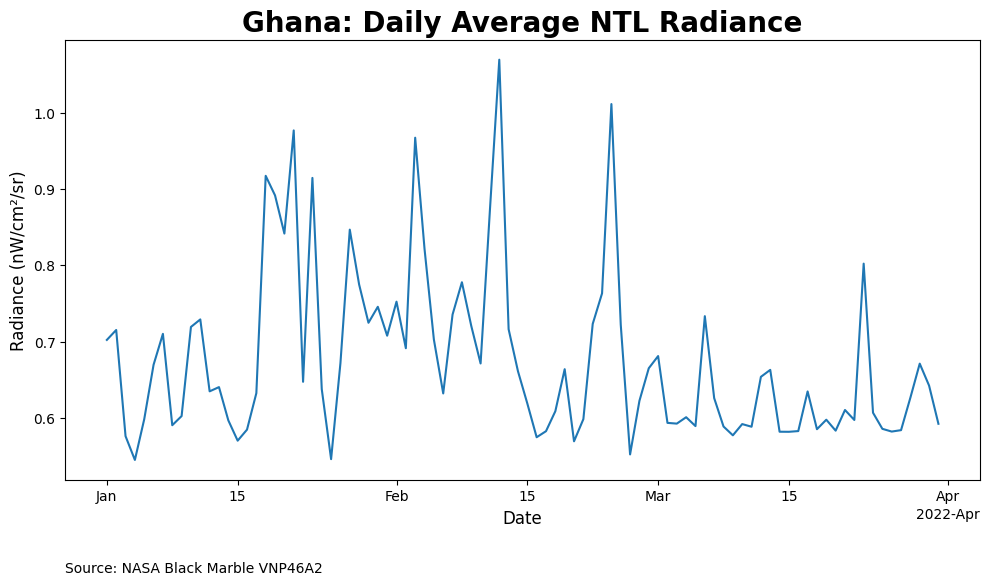

In [13]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the mean NTL radiance over the dimensions x and y
r_daily["Gap_Filled_DNB_BRDF-Corrected_NTL"].mean(dim=["x", "y"]).plot(ax=ax)

# Add the data source text
ax.text(
    0,
    -0.2,
    "Source: NASA Black Marble VNP46A2",
    ha="left",
    va="center",
    transform=ax.transAxes,
    fontsize=10,
    color="black",
    weight="normal",
)

# Set the title with appropriate fontsize
ax.set_title("Ghana: Daily Average NTL Radiance", fontsize=20, weight="bold")

# Add labels to the axes
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Radiance (nW/cm²/sr)", fontsize=12)

# Adjust layout for better spacing
fig.tight_layout()

# Show the plot
plt.show()

```{figure} ../../images/favicon.ico
---
height: 0px
---
This figures describes the daily average nighttime lights radiance data plotted over time. The data reflects fluctuations in radiance levels due to varying cloud cover, affecting the accuracy of the measurements
```

In [14]:
# Raster stack of monthly data
r_monthly = bm_raster(
    gdf,
    product_id="VNP46A3",
    date_range=pd.date_range("2022-01-01", "2022-12-31", freq="MS"),
    bearer=bearer,
)

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/48 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0.00/10.6M [00:00<?, ?B/s]

  0%|          | 0.00/8.50M [00:00<?, ?B/s]

  0%|          | 0.00/10.6M [00:00<?, ?B/s]

  0%|          | 0.00/8.79M [00:00<?, ?B/s]

  0%|          | 0.00/10.2M [00:00<?, ?B/s]

  0%|          | 0.00/10.2M [00:00<?, ?B/s]

  0%|          | 0.00/12.5M [00:00<?, ?B/s]

  0%|          | 0.00/9.15M [00:00<?, ?B/s]

  0%|          | 0.00/9.44M [00:00<?, ?B/s]

  0%|          | 0.00/9.73M [00:00<?, ?B/s]

  0%|          | 0.00/11.2M [00:00<?, ?B/s]

  0%|          | 0.00/7.80M [00:00<?, ?B/s]

  0%|          | 0.00/8.26M [00:00<?, ?B/s]

  0%|          | 0.00/7.82M [00:00<?, ?B/s]

  0%|          | 0.00/10.0M [00:00<?, ?B/s]

  0%|          | 0.00/8.28M [00:00<?, ?B/s]

  0%|          | 0.00/7.41M [00:00<?, ?B/s]

  0%|          | 0.00/8.42M [00:00<?, ?B/s]

  0%|          | 0.00/11.7M [00:00<?, ?B/s]

  0%|          | 0.00/9.68M [00:00<?, ?B/s]

  0%|          | 0.00/8.50M [00:00<?, ?B/s]

  0%|          | 0.00/9.14M [00:00<?, ?B/s]

  0%|          | 0.00/7.41M [00:00<?, ?B/s]

  0%|          | 0.00/7.99M [00:00<?, ?B/s]

  0%|          | 0.00/7.39M [00:00<?, ?B/s]

  0%|          | 0.00/8.05M [00:00<?, ?B/s]

  0%|          | 0.00/7.97M [00:00<?, ?B/s]

  0%|          | 0.00/9.00M [00:00<?, ?B/s]

  0%|          | 0.00/7.96M [00:00<?, ?B/s]

  0%|          | 0.00/7.62M [00:00<?, ?B/s]

  0%|          | 0.00/7.53M [00:00<?, ?B/s]

  0%|          | 0.00/7.79M [00:00<?, ?B/s]

  0%|          | 0.00/9.35M [00:00<?, ?B/s]

  0%|          | 0.00/8.64M [00:00<?, ?B/s]

  0%|          | 0.00/8.50M [00:00<?, ?B/s]

  0%|          | 0.00/9.17M [00:00<?, ?B/s]

  0%|          | 0.00/11.5M [00:00<?, ?B/s]

  0%|          | 0.00/8.44M [00:00<?, ?B/s]

  0%|          | 0.00/12.2M [00:00<?, ?B/s]

  0%|          | 0.00/11.5M [00:00<?, ?B/s]

  0%|          | 0.00/9.58M [00:00<?, ?B/s]

  0%|          | 0.00/9.13M [00:00<?, ?B/s]

  0%|          | 0.00/11.4M [00:00<?, ?B/s]

  0%|          | 0.00/9.49M [00:00<?, ?B/s]

  0%|          | 0.00/9.06M [00:00<?, ?B/s]

  0%|          | 0.00/10.4M [00:00<?, ?B/s]

  0%|          | 0.00/11.5M [00:00<?, ?B/s]

  0%|          | 0.00/9.48M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/48 [00:00<?, ?it/s]

COLLATING TILES | Processing...:   0%|          | 0/12 [00:00<?, ?it/s]

In [15]:
r_monthly

<xarray.Dataset> Size: 159MB
Dimensions:                        (x: 1071, y: 1545, time: 12)
Coordinates:
  * x                              (x) float64 9kB -3.259 -3.255 ... 1.193 1.197
  * y                              (y) float64 12kB 11.17 11.17 ... 4.746 4.742
  * time                           (time) datetime64[ns] 96B 2022-01-01 ... 2...
Data variables:
    NearNadir_Composite_Snow_Free  (time, y, x) float64 159MB nan nan ... nan
Attributes: (12/39)
    AlgorithmType:                     b'SCI'
    AlgorithmVersion:                  b'NPP_PR46A3 2.0.0'
    Conventions:                       b'CF-1.6'
    creator_email:                     b'modis-ops@lists.nasa.gov'
    creator_name:                      b'VIIRS Land SIPS Processing Group'
    creator_url:                       b'https://ladsweb.modaps.eosdis.nasa.gov'
    ...                                ...
    VersionID:                         b'001'
    VerticalTileNumber:                b'07'
    WestBoundingCoord:                 0.0
    AREA_OR_POINT:                     Area
    scale_factor:                      1.0
    add_offset:                        0.0

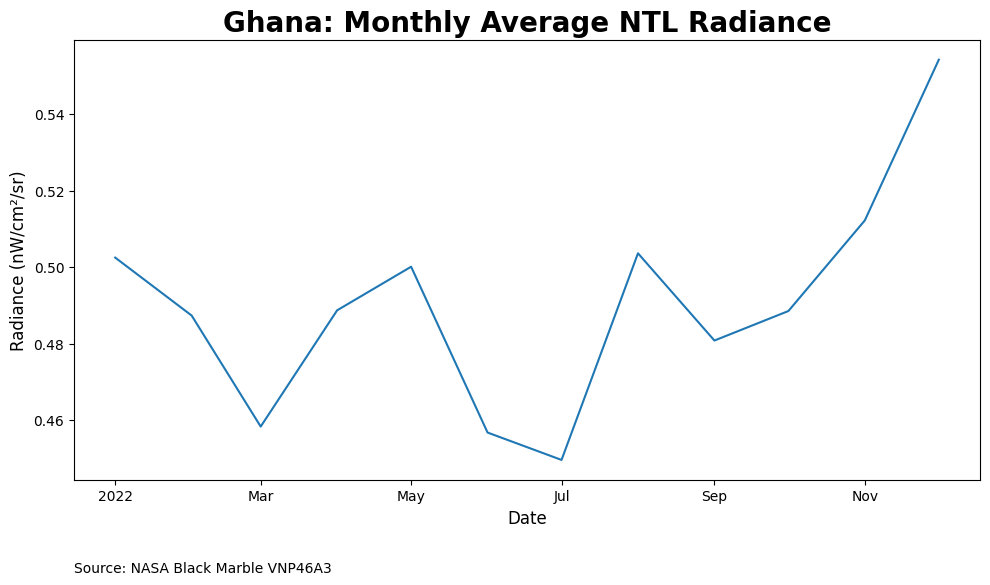

In [16]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the mean NTL radiance over the dimensions x and y
r_monthly["NearNadir_Composite_Snow_Free"].mean(dim=["x", "y"]).plot(ax=ax)

# Add the data source text
ax.text(
    0,
    -0.2,
    "Source: NASA Black Marble VNP46A3",
    ha="left",
    va="center",
    transform=ax.transAxes,
    fontsize=10,
    color="black",
    weight="normal",
)

# Set the title with appropriate fontsize
ax.set_title("Ghana: Monthly Average NTL Radiance", fontsize=20, weight="bold")

# Add labels to the axes
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Radiance (nW/cm²/sr)", fontsize=12)

# Adjust layout for better spacing
fig.tight_layout()

# Show the plot
plt.show()

```{figure} ../../images/favicon.ico
---
height: 0px
---
This figures describes the monthly average nighttime lights radiance data plotted over time. The data reflects fluctuations in radiance levels due to varying cloud cover, affecting the accuracy of the measurements
```

In [18]:
# Raster stack of yearly data
r_yearly = bm_raster(
    gdf,
    product_id="VNP46A4",
    date_range=pd.date_range("2019-01-01", "2022-01-01", freq="YS"),
    bearer=bearer,
)

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/16 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0.00/9.37M [00:00<?, ?B/s]

  0%|          | 0.00/9.68M [00:00<?, ?B/s]

  0%|          | 0.00/9.18M [00:00<?, ?B/s]

  0%|          | 0.00/8.98M [00:00<?, ?B/s]

  0%|          | 0.00/13.8M [00:00<?, ?B/s]

  0%|          | 0.00/14.0M [00:00<?, ?B/s]

  0%|          | 0.00/14.6M [00:00<?, ?B/s]

  0%|          | 0.00/13.4M [00:00<?, ?B/s]

  0%|          | 0.00/14.5M [00:00<?, ?B/s]

  0%|          | 0.00/13.8M [00:00<?, ?B/s]

  0%|          | 0.00/13.8M [00:00<?, ?B/s]

  0%|          | 0.00/13.2M [00:00<?, ?B/s]

  0%|          | 0.00/9.66M [00:00<?, ?B/s]

  0%|          | 0.00/9.68M [00:00<?, ?B/s]

  0%|          | 0.00/9.55M [00:00<?, ?B/s]

  0%|          | 0.00/9.66M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/16 [00:00<?, ?it/s]

COLLATING TILES | Processing...:   0%|          | 0/4 [00:00<?, ?it/s]

In [19]:
r_yearly

<xarray.Dataset> Size: 53MB
Dimensions:                        (x: 1071, y: 1545, time: 4)
Coordinates:
  * x                              (x) float64 9kB -3.259 -3.255 ... 1.193 1.197
  * y                              (y) float64 12kB 11.17 11.17 ... 4.746 4.742
  * time                           (time) datetime64[ns] 32B 2019-01-01 ... 2...
Data variables:
    NearNadir_Composite_Snow_Free  (time, y, x) float64 53MB nan nan ... nan nan
Attributes: (12/39)
    AlgorithmType:                     b'SCI'
    AlgorithmVersion:                  b'NPP_PR46A3 2.0.0'
    Conventions:                       b'CF-1.6'
    DataResolution:                    b'15 arc second'
    DayNightFlag:                      b'Night'
    HorizontalTileNumber:              b'17'
    ...                                ...
    NorthBoundingCoord:                10.0
    publisher_email:                   b'modis-ops@lists.nasa.gov'
    publisher_name:                    b'LAADS'
    publisher_url:                     b'https://ladsweb.modaps.eosdis.nasa.gov'
    SouthBoundingCoord:                0.0
    WestBoundingCoord:                 -10.0

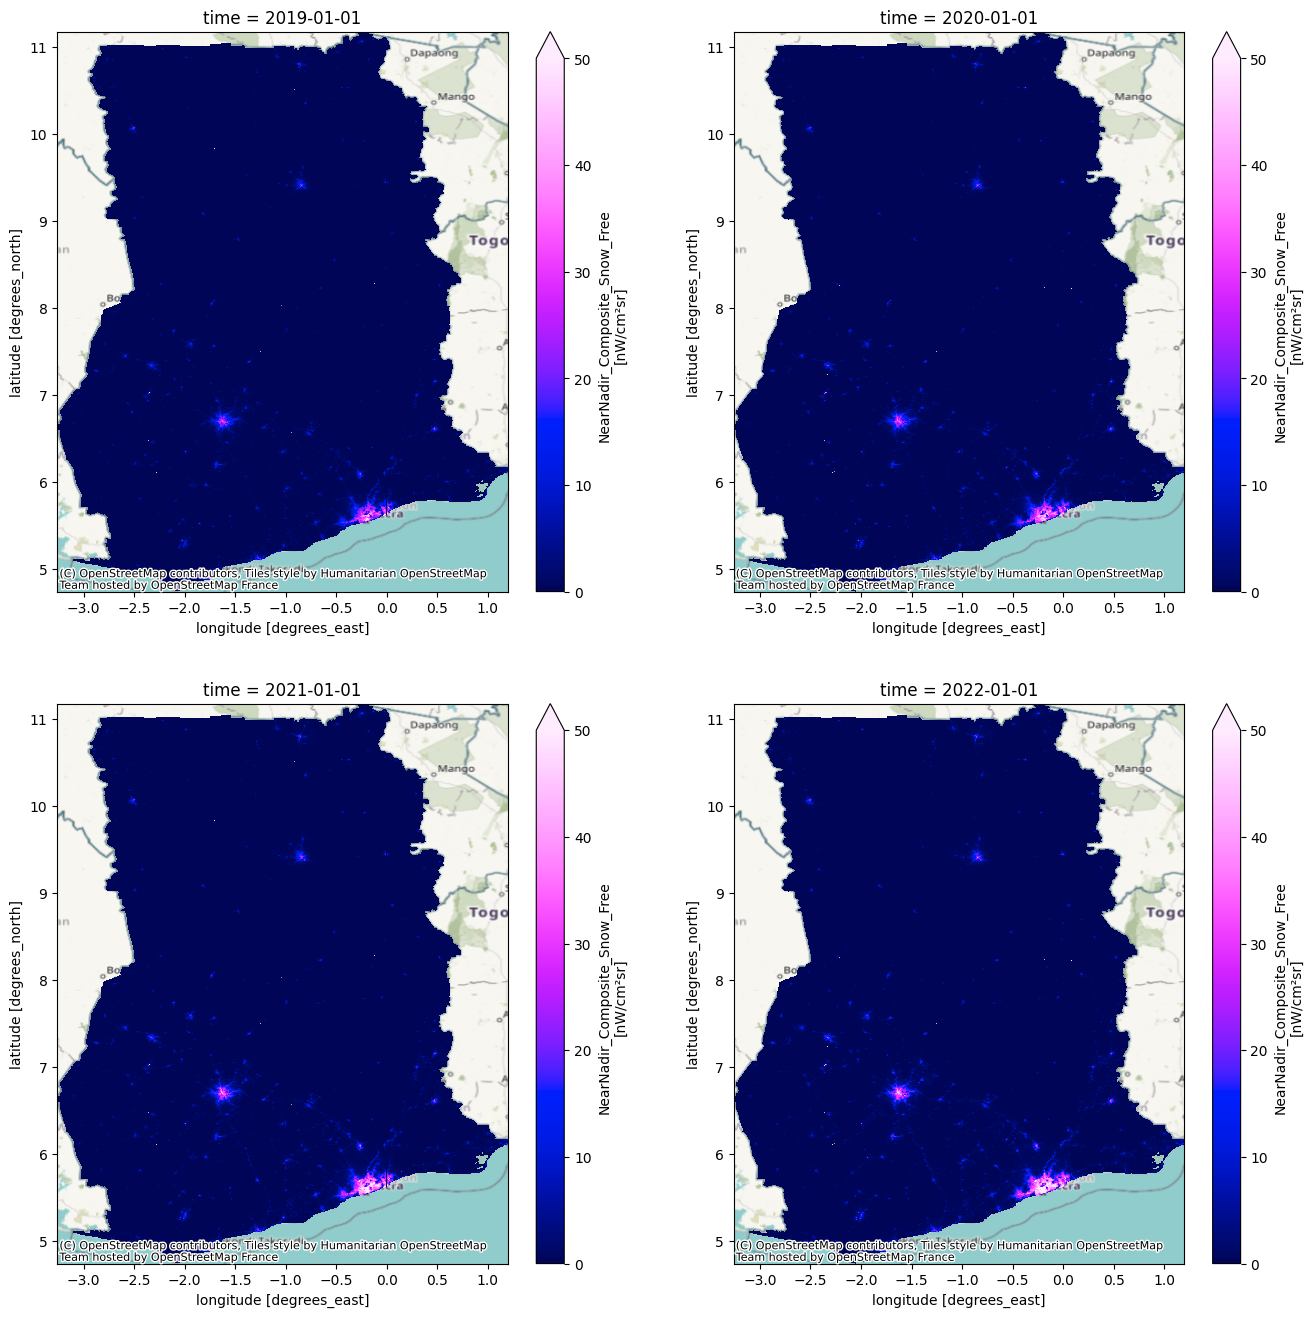

In [20]:
# Set up the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 16))

for i, t in enumerate(r_yearly["time"]):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    r_yearly["NearNadir_Composite_Snow_Free"].sel(time=t).plot.pcolormesh(
        ax=ax,
        cmap=cc.cm.bmw,
        robust=True,
        vmax=50,
    )
    cx.add_basemap(ax, crs=gdf.crs.to_string())

plt.show()

```{figure} ../../images/favicon.ico
---
height: 0px
---
Temporal variation of `NearNadir_Composite_Snow_Free` mapped over multiple years. Each subplot represents a different time period overlaid with a basemap.
```

### Downloading and Saving Black Marble Data Locally

In this section, we provide a guide on using [BlackMarblePy](https://worldbank.github.io/blackmarblepy) to download [NASA Black Marble](https://blackmarble.gsfc.nasa.gov) data and save it to a specified local directory. You can use the `output_directory` parameter to designate the directory for saving the files. By default, files that have already been downloaded will not be re-downloaded in subsequent executions.

In [21]:
bm_raster(
    gdf,
    product_id="VNP46A4",
    date_range=pd.date_range("2022-01-01", "2022-01-01", freq="YS"),
    output_directory="data/",
    output_skip_if_exists=True,  # default
    bearer=bearer,
)

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING TILES | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

<xarray.Dataset> Size: 13MB
Dimensions:                        (x: 1071, y: 1545, time: 1)
Coordinates:
  * x                              (x) float64 9kB -3.259 -3.255 ... 1.193 1.197
  * y                              (y) float64 12kB 11.17 11.17 ... 4.746 4.742
  * time                           (time) datetime64[ns] 8B 2022-01-01
Data variables:
    NearNadir_Composite_Snow_Free  (time, y, x) float64 13MB nan nan ... nan nan
Attributes: (12/51)
    AlgorithmType:                     b'SCI'
    AlgorithmVersion:                  b'NPP_PR46A3 2.0.0'
    Conventions:                       b'CF-1.6'
    creator_email:                     b'modis-ops@lists.nasa.gov'
    creator_name:                      b'VIIRS Land SIPS Processing Group'
    creator_url:                       b'https://ladsweb.modaps.eosdis.nasa.gov'
    ...                                ...
    VersionID:                         b'001'
    VerticalTileNumber:                b'07'
    WestBoundingCoord:                 0.0
    AREA_OR_POINT:                     Area
    scale_factor:                      1.0
    add_offset:                        0.0

Alternatively, set `output_skip_if_exists=False` to force the redownload of files from NASA.

In [22]:
bm_raster(
    gdf,
    product_id="VNP46A4",
    date_range=pd.date_range("2022-01-01", "2022-01-01", freq="YS"),
    output_directory="data/",
    output_skip_if_exists=False,
    bearer=bearer,
)

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/13.2M [00:00<?, ?B/s]

  0%|          | 0.00/9.55M [00:00<?, ?B/s]

  0%|          | 0.00/13.4M [00:00<?, ?B/s]

  0%|          | 0.00/9.68M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING TILES | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

<xarray.Dataset> Size: 13MB
Dimensions:                        (x: 1071, y: 1545, time: 1)
Coordinates:
  * x                              (x) float64 9kB -3.259 -3.255 ... 1.193 1.197
  * y                              (y) float64 12kB 11.17 11.17 ... 4.746 4.742
  * time                           (time) datetime64[ns] 8B 2022-01-01
Data variables:
    NearNadir_Composite_Snow_Free  (time, y, x) float64 13MB nan nan ... nan nan
Attributes: (12/51)
    AlgorithmType:                     b'SCI'
    AlgorithmVersion:                  b'NPP_PR46A3 2.0.0'
    Conventions:                       b'CF-1.6'
    creator_email:                     b'modis-ops@lists.nasa.gov'
    creator_name:                      b'VIIRS Land SIPS Processing Group'
    creator_url:                       b'https://ladsweb.modaps.eosdis.nasa.gov'
    ...                                ...
    VersionID:                         b'001'
    VerticalTileNumber:                b'07'
    WestBoundingCoord:                 0.0
    AREA_OR_POINT:                     Area
    scale_factor:                      1.0
    add_offset:                        0.0

### Visualizing difference in radiance year over year

Lastly, we calculate the increase/decrease in nighttime lights radiance levels.

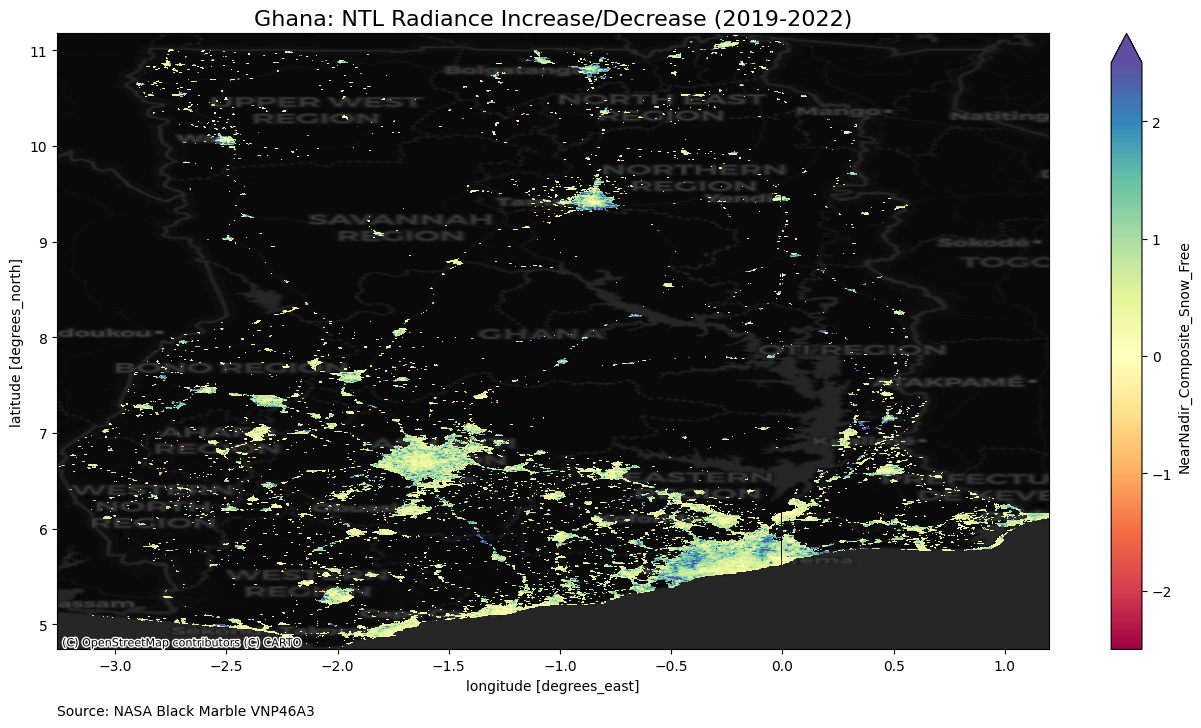

In [23]:
fig, ax = plt.subplots(figsize=(16, 8))

delta = (
    (
        (
            r_yearly["NearNadir_Composite_Snow_Free"].sel(time="2022-01-01")
            - r_yearly["NearNadir_Composite_Snow_Free"].sel(time="2019-01-01")
        )
        / r_yearly["NearNadir_Composite_Snow_Free"].sel(time="2019-01-01")
    )
    # .drop("time")
    .plot.pcolormesh(ax=ax, cmap="Spectral", robust=True)
)
cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.CartoDB.DarkMatter)

ax.text(
    0,
    -0.1,
    "Source: NASA Black Marble VNP46A3",
    ha="left",
    va="center",
    transform=ax.transAxes,
    fontsize=10,
    color="black",
    weight="normal",
)
ax.set_title("Ghana: NTL Radiance Increase/Decrease (2019-2022)", fontsize=16);

```{figure} ../../images/favicon.ico
---
height: 0px
---
This figure displays the percentage change in radiance for Ghana between 2019 and 2022. The data, sourced from NASA's Black Marble VNP46A3 product is visualized with basemap.
```

### Compute trends on nighttime lights over time

In this section, we use the `bm_extract` function to observe treends in nighttime lights over time. The `bm_extract` function leverages the [rasterstats](https://pythonhosted.org/rasterstats/) package to aggregate nighttime lights data to polygons. In the following example, we show trends in annual nighttime lights data across Ghana's first-administrative divisions.

In [24]:
VNP46A4 = bm_extract(
    gdf,
    "VNP46A4",
    pd.date_range("2012-01-01", "2023-01-01", freq="YS"),
    bearer,
    output_directory="data/",
)

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/48 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/48 [00:00<?, ?it/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/48 [00:00<?, ?it/s]

COLLATING TILES | Processing...:   0%|          | 0/12 [00:00<?, ?it/s]

In [25]:
p = figure(
    title="Ghana Regions: Annual Average Nighttime Lights Radiance",
    width=760,
    height=600,
    x_axis_label="Year",
    x_axis_type="datetime",
    y_axis_type="log",
    y_axis_label="NTL Radiance",
    tools="pan,wheel_zoom,box_zoom,reset,save,box_select",
)
p.add_layout(
    Title(
        text=f"Source: NASA Black Marble. Creation date: {datetime.datetime.today().strftime('%d %B %Y')}.",
        text_font_size="10pt",
        text_font_style="italic",
    ),
    "below",
)
p.add_tools(
    HoverTool(
        tooltips=[
            ("Year", "@x{%Y}"),
            ("Radiance", "@y{0.00}"),
        ],
        formatters={"@x": "datetime"},
    )
)

data = VNP46A4.pivot_table(
    index="date", columns=["NAME_1"], values=["ntl_mean"], aggfunc="mean"
)

for column, color in zip(data.columns, cc.glasbey):
    r = p.line(
        data.index,
        data[column],
        legend_label=column[1],
        line_color=color,
        line_dash="dotdash",
        line_width=2,
    )

p.legend.click_policy = "hide"
p.title.text_font_size = "16pt"

p.add_layout(p.legend[0], "right")

output_notebook()
show(p)

Loading BokehJS ...

```{figure} ../../images/favicon.ico
---
height: 0px
---
This figure illustrates the trend in nighttime lights radiance across Ghana over the period from 2012 to 2023. The X-axis represents the years from 2012 to 2023, while the Y-axis measures the radiance in nanowatts per square centimeter per steradian (nW/cm²/sr). The data highlights changes in light intensity, which can be indicative of economic activity, urbanization, and infrastructure development. Data source: NASA Black Marble VNP46A4 retrieved with [BlackMarblePy](https://worldbank.github.io/blackmarblepy).
```

## References 

{cite:empty}`ROMAN2018113`
{cite:empty}`blackmarblepy`

```{bibliography}
:filter: docname in docnames
:style: plain
```